## Some basic plotting experiments

This notebook contains some basic plotting experiments, and explores a few libraries available in Python.  We start with the somewhat familiar matplotlib, and survey a few other libraries. Matplotlib is a very capable library for 2-dimensional visualization, although it can sometimes take a fair bit of effort to make the plots exactly as one might like. 

After exploring matplotlib, we will survey other libraries for 2d and 3d graphics, as well as interactive graphics, and on-line interactive graphics presentations.

## Plotting in two dimensions with matplotlib.

We have already done some basic plotting with matplotlib.  Here we explore the basics of the interface in some detail. 

A useful resource for the basics of matplotlib is the [matplotlib FAQ "General Concepts" section](http://matplotlib.org/devdocs/faq/usage_faq.html#general-concepts).  It outlines the primary structures and terminology used by matplotlib.  We summarize this below. 

The **matplotlib.pyplot** module is the core library for producing 2-dimensional plots in matplotlib.  A display produced by matplotlib is called a **figure**, and figures have potentially many parts, called **axes**. 

<img src="fig_map.png" alt="Riemann sum example" width=300 height=300 alt="taken from http://matplotlib.org/devdocs/faq/usage_faq.html#general-concepts">

The **axes** belong to the figure.  matplotlib has a high-level graphics-display object called an **artist** and all objects (figures, axes, axis, text, etc) are artist objects. 

matplotlib expects all array-objects to be **numpy** arrays.  Other array types can work in matplotlib but often these create problems. 

matplotlib documentation distinguishes between the **backend** and the **frontend**. 
    
    - The frontend refers to the way in which you generate code for matplotlib.  For us, this is the i-python notebook.  
    - The backend refers to how one turns the code into graphics, or potentially an interactive environment. There are two primary backend types for matplotlib:
        - Hardcopy backends.  These generate static image files from your code. 
        - Interactive backends.  These generate code (some generate and execute the code) for interactive graphics.  For example, one can generate java code that can be integrated with a web-page to render your application on-line.
        
For most tasks we will use the default backend for matplotlib.  This requires no special actions. We will also explore applications that use other backends. 

### Simple plot types with matplotlib

Let's start off making a basic figure.


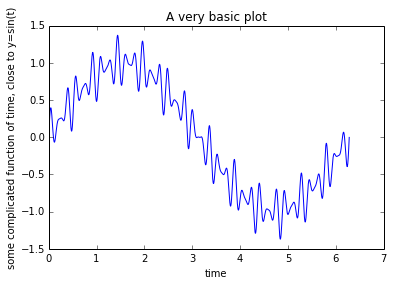

In [2]:
## let's begin with a basic plot that we can dress-up later.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## the data
dt = 0.001 ## how closely the x-coordinates are spaced
t = np.arange(0.0, 2*np.pi, dt) ## x-coordinates of the plot
y = np.sin(t) + (0.2+0.18*np.cos(13*t))*np.sin(36*t) ## y-oordinates of the plot

## the plot
plt.plot(t,y) # the x-axis coordinates come from the t-array. The y-axis from y-array.
plt.xlabel('time')
plt.ylabel('some complicated function of time, close to y=sin(t)')
plt.title('A very basic plot')

Criticisms or standard things one might want to change in a plot such as the above:
    
    1) It's too small.  
    2) Notice the "box" is not cleanly aligned to the data on the right-side.
    3) Let's make the text biggger. 
    4) Let's add a box in the top-right that says something, say if you wanted to insert a legend, or insert additional details for some other reason. 
    5) Let's make the y-axis text fit the box. 

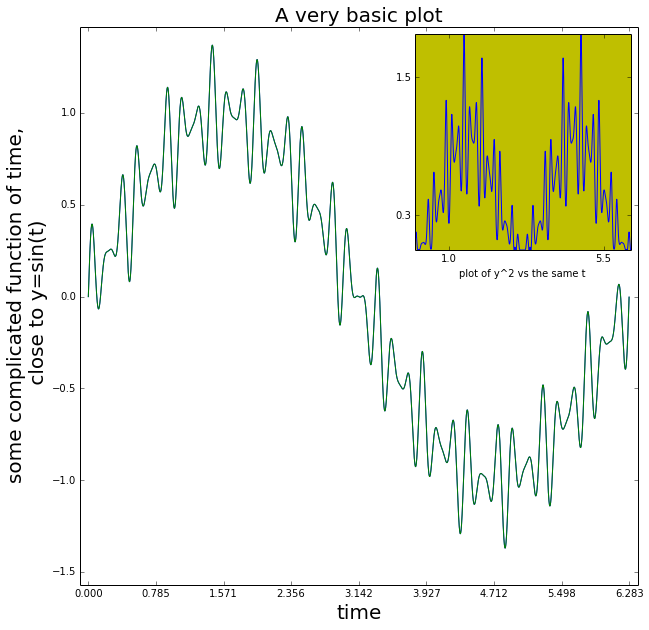

In [3]:
fig = plt.figure() ## get the figure-object for our plot.
fig.set_size_inches(10,10) ## set the dimensions for the figure

plt.plot(t,y) ## use "fontsize" to adjust size of font.
plt.xlabel('time', fontsize=20)
plt.ylabel('some complicated function of time,\n close to y=sin(t)', fontsize=20)
plt.title('A very basic plot', fontsize=20)

## Here we set the **axis** (not axes!).  axis are just the
##  bounding box and decorations associated to our figure. 
xpad=0.1 ## gap between graph and box on left/right
ypad=0.2 ## gap between graph and box top/bot
plt.axis([0-xpad, 2*np.pi+xpad, np.amin(y)-ypad, np.amax(y)+xpad])
plt.plot(t,y)
plt.xticks([i*np.pi/4 for i in range(9)]) ## set the bottom ticks to be
  ## multiples of pi. 

ax1 = plt.axes([0.59,0.59, 0.3, 0.3], axisbg='y')
## the first two coordinates are the (x,y) coordinates
## of the bottom-left of our red box.  The second two
## are the width and height.  All are given int terms of
## the dimensions of the underlying figure, with dimensions
## measured from 0 to 1.  There are routines that allow you 
## to convert between these "natural figure dimensions" and
## the dimensions of your data.  
plt.xticks([1.0, 5.5]) ## change location of the tick marks
plt.yticks([0.3, 1.5])
plt.plot(t,y**2)
plt.xlabel("plot of y^2 vs the same t")

Sometimes your data will have details you will want to see, but a standard linear scale (eg $\{0, 1, 2, 3, 4, \cdots\}$ all spaced equally) does not suffice. 

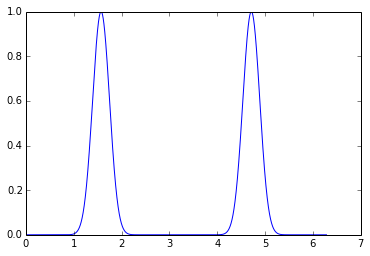

In [4]:
dt = 0.001 ## how closely the x-coordinates are spaced
t = np.arange(0.0, 2*np.pi, dt) ## x-coordinates of the plot
y = (np.sin(t))**32
plt.plot(t,y) ## standard linear plot
#plt.semilogy(t,y) ## log plot on only the y-axis
 ## there is also a semilogx plot call
#plt.loglog(t,y) ## logarithm of both the x and y-axis

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


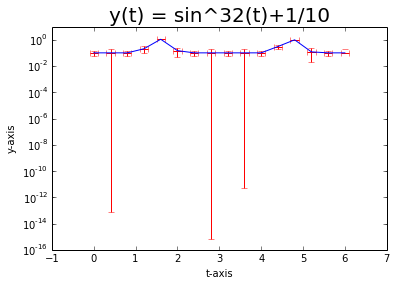

In [5]:
## somewhat less related is the "plot with error bars" command
## for this, we pass the errors in the x and y coordinates as lists

dt = 0.4 ## how closely the x-coordinates are spaced
t = np.arange(0.0, 2*np.pi, dt) ## x-coordinates of the plot
y = (np.sin(t))**32+0.1
ax1 = plt.subplot() ## another routine to request axis, and specify location
ax1.set_yscale("log")  ## you can set the scale with the axes, too. 

yerrarr = np.zeros_like(t)
## let's make the y errors somewhat irregular
for i in range(len(yerrarr)): yerrarr[i] = 0.04+0.06*np.sin(8*np.pi*i/float(len(yerrarr)))**2

## the plot takes the t coordinates, y coordinates, x-error bars as an array, 
## and y-error bars as an array.
plt.errorbar(t,y, xerr=np.zeros_like(t)+0.1, yerr=yerrarr, ecolor='r')
plt.title("y(t) = sin^32(t)+1/10", fontsize=20)
plt.xlabel("t-axis")
plt.ylabel("y-axis")

You can also use LaTex in your text. 

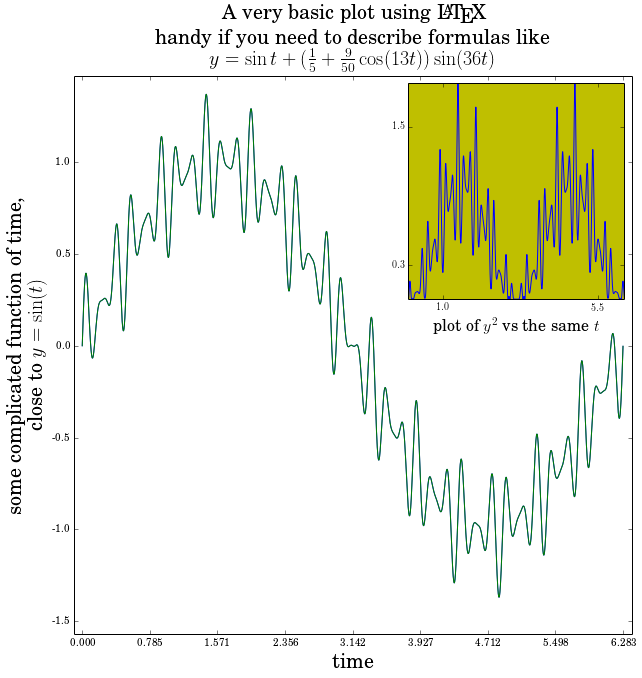

In [6]:
## Let's repeat a previous plot, but with some LaTeX. 
fig = plt.figure() 
fig.set_size_inches(10,10) 

dt = 0.001 ## how closely the x-coordinates are spaced
t = np.arange(0.0, 2*np.pi, dt) ## x-coordinates of the plot
y = np.sin(t) + (0.2+0.18*np.cos(13*t))*np.sin(36*t) ## y-oordinates of the plot

plt.plot(t,y) 

## this tells matplotlib to use LaTeX to construct all the text!
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel('time', fontsize=20)
plt.ylabel('some complicated function of time,\n close to $y=\sin(t)$', fontsize=20)
plt.title("A very basic plot using \LaTeX\n"
          "handy if you need to describe formulas like \n"
          r"$y=\sin t+(\frac{1}{5}+\frac{9}{50}\cos(13t))\sin(36t)$", fontsize=20)
## in the above the r before the quote indicates a "raw" string, making 
## escape sequences, such as \n disabled.  This is because it would interpret
## \f as an escape sequence.  You could also type a regular string and write
## \\frac instead of \frac

xpad=0.1 ## gap between graph and box on left/right
ypad=0.2 ## gap between graph and box top/bot
plt.axis([0-xpad, 2*np.pi+xpad, np.amin(y)-ypad, np.amax(y)+xpad])
plt.plot(t,y)
plt.xticks([i*np.pi/4 for i in range(9)]) ## set the bottom ticks to be
  ## multiples of pi. 

ax1 = plt.axes([0.59,0.59, 0.3, 0.3], axisbg='y')
plt.xticks([1.0, 5.5]) ## change location of the tick marks
plt.yticks([0.3, 1.5])
plt.plot(t,y**2)
plt.xlabel("plot of $y^2$ vs the same $t$", fontsize=16)

## Other kinds of 2d plots in matplotlib. 

matplotlib lets you do any kind of 2d plot, the limit being only your imagination and the amount of time you are willing to put into the process.  But matplotlib also has a few helper-routines to make certain kinds of plots relatively easy-to-do.  We demonstrate below:

    - shapes - produces standard shapes like arrows, regular polygons, boxes with rounded corners, circles, filled closed splines, etc. 
    - histograms 
    - contour plots - ?
    - pie charts - 
    - polar coordinate plots
    

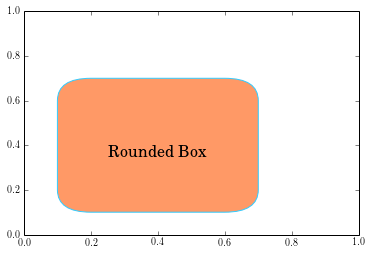

In [7]:
## a shape example: arrows, rounded rectanges, etc. 
import matplotlib.patches as mpat

fig, ax = plt.subplots()

## first pair are bottom-left coordinates before rectangle is "rounded"
##  the second numbers are the width and height, like a regular rectangle.
##
## the pad number is the radius of the rounding, think of this as a little
## disc of this radius being run with its centre along the original rectangle
## boundary. 
##
## fc is the filling color.  ec is the boundary color.
rbox = mpat.FancyBboxPatch( (0.2,0.2), 0.4, 0.4, boxstyle="round,pad=0.1",
                           fc=(1.0, 0.6, 0.4), 
                           ec=(0.2, 0.8, 1.0) )
ax.add_patch(rbox)

ax.text(0.25, 0.35, 'Rounded Box', size=16)


(-2.0, 2.5, 0.0, 3.0)

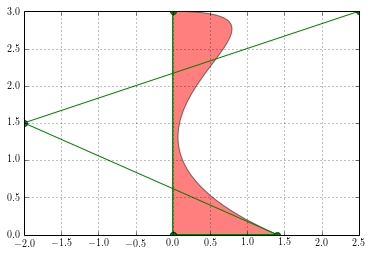

In [8]:
## a spline example
import matplotlib.patches as mpat
import matplotlib.path as mpth

fig, ax = plt.subplots()

P = mpth.Path
path_data = [
    (P.MOVETO, (0,0)),
    (P.LINETO, (0,3)),
    (P.CURVE4, (2.5,3)),
    (P.CURVE4, (-2, 1.5)), 
    (P.LINETO, (1.4,0)),
    (P.CLOSEPOLY, (0,0)),
    ]
codes,verts = zip(*path_data)
path = mpth.Path(verts,codes)
patch = mpat.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

x,y=zip(*path.vertices)
line, = ax.plot(x,y,'go-')
ax.grid()
ax.axis('equal')

## A histogram example

## TODO

/usr/lib/python3/dist-packages/matplotlib/collections.py:609: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


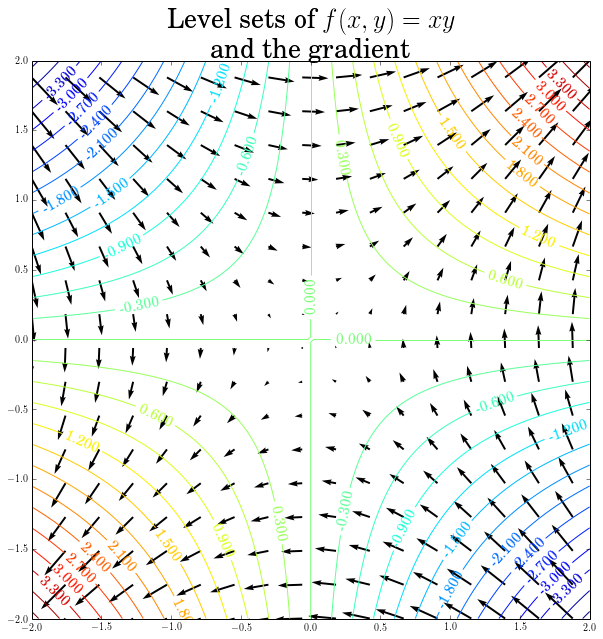

In [42]:
## a contour plot.  Let's try a typical multi-variable calculus
##  plot of level-sets and gradient vector field
fig, ax = plt.subplots() 
fig.set_size_inches(10,10) 

import sympy as sp
x,y = sp.symbols('x y')
f = x*y
#f = x**3-x*y**2
#f = x**4-6*x**2*y**2+y**4
## try a few of the others, these are the real part of z^n = (x+iy)^n for n=2,3,4. 

grad = [sp.diff(f,x), sp.diff(f,y)]

import matplotlib.mlab as mlab
Z = sp.lambdify( (x,y), f, "numpy")
Zx = sp.lambdify( (x,y), grad[0], "numpy")
Zy = sp.lambdify( (x,y), grad[1], "numpy")

Y, X = np.mgrid[-2:2:100j, -2:2:100j] ## x and y coordinates of a 2-dimension array of points
 ## in the plane

speed = np.sqrt(Zx(X,Y)**2 + Zy(X,Y)**2)
mspd = speed.max()
    
CP = plt.contour(X,Y,Z(X,Y), 30) ## 30 contours plotted.
plt.clabel(CP, inline=1, fontsize=14) ## this add the level-set number to the curve

## the main tool for plotting vector fields is the quiver object
## it allows you to set a variety of properties of the vectors
##  pivot is where you centre your plotted vector, i.e. do you put the tail, head or
##  some other point at the X,Y coordinate for the vector field Zx(X,Y), Zy(X,Y)
Xs = X[::6,::6]
Ys = Y[::6,::6]
ax.quiver(Xs,Ys,Zx(Xs,Ys), Zy(Xs,Ys), scale_units='xy', scale=10)

## I find the flow lines easier to process than the actual 
##  vector field.  streamplot gives us the flow lines.
#ax.streamplot(X, Y, Zx(X,Y), Zy(X,Y), color='0.2', density=0.5, 
#              linewidth=5*(speed/mspd) )

plt.title("Level sets of $"+sp.latex(sp.Eq(sp.Symbol('f(x,y)'), f) )+"$\n"
          "and the gradient", fontsize=26)


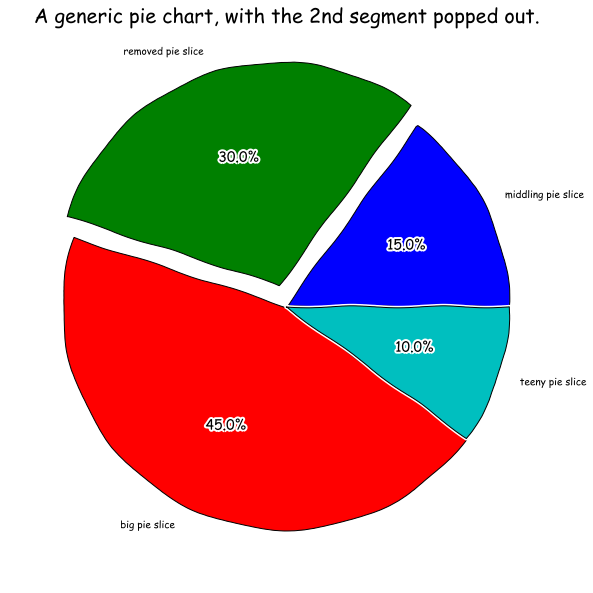

In [45]:
## a pie chart, using the xkcd style

## unfortunately the xkcd style does not allow for latex, so we disable
## latex text output. 
plt.rc('text', usetex=False)

with plt.xkcd(): ## this enables the xkcd style.
    
    fig=plt.figure()
    fig.set_size_inches(10,10) 
    
    fracs = [15,30,45,10]
    pushOut = (0,0.1,0,0) ##
    labL = 'middling pie slice', 'removed pie slice', 'big pie slice', 'teeny pie slice'
    
    ## explode is the push-out parameter.  labels are the text around the
    ## circumference.  autopct puts the percentage in the pie slices. 
    ## shadow adds a bit of depth to the image.
    plt.pie(fracs, explode=pushOut, labels=labL, autopct='%1.1f%%', shadow=False)
    ## shadow=True / False
    plt.title('A generic pie chart, with the 2nd segment popped out.', fontsize=20)
    

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


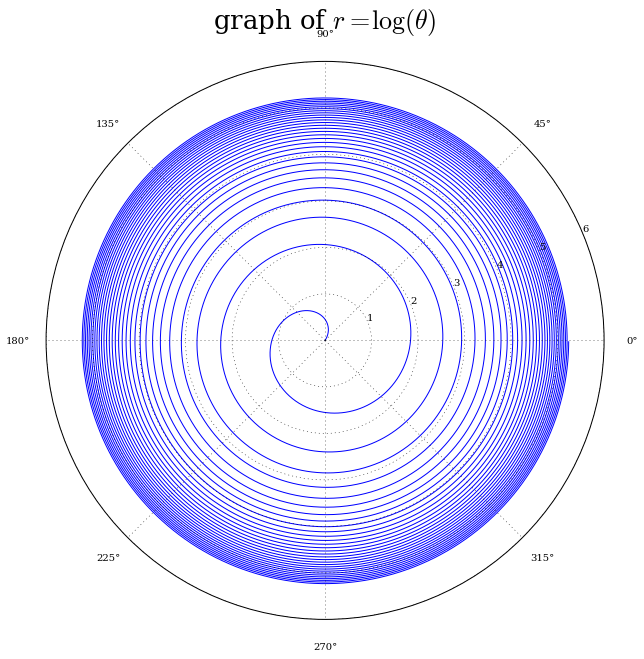

In [46]:
## polar coordinates

theta = np.arange(0, 30*2*np.pi, 0.01)
r = np.log(theta)

ax = plt.subplot(projection='polar')
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.plot(theta, r)
plt.title("graph of $r=\\log(\\theta)$", fontsize=26)

### A simple interactive matplotlib plot. 

In [47]:
%matplotlib qt
## this sets the back-end. qt, wx, gtk, tk
##  for me qt seems to be what I need. 

import numpy as np
import pylab as pl
from matplotlib.widgets import Slider, Button, RadioButtons

ax = pl.subplot(111)
pl.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = pl.plot(t,s, lw=2, color='red')
pl.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = pl.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp  = pl.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    draw()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = pl.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = pl.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
def colorfunc(label):
    l.set_color(label)
    draw()
radio.on_clicked(colorfunc)

pl.show()

## Plotting in three dimensions with matplotlib.

matplotlib has some elements of 3-dimensional plotting but it has largely not been designed for this task.  Below we demonstrate one example, a parametric surface. 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

t1 = np.linspace(0, 2*np.pi, 100)
t2 = np.linspace(0, 2*np.pi, 100)

## we use outer to form a doubly-indexed list of numbers.
## alternatively one could form the doubly-index list
## beforehand...
bigR = 1.0
smR = 0.2
x1 = np.outer( (bigR+smR*np.cos(t1)), np.cos(t2) )
y1 = np.outer( (bigR+smR*np.cos(t1)), np.sin(t2) )
z1 = np.outer( smR*np.sin(t1), np.ones(np.size(t2)) ) 

ax.set_title('A more pleasant view of the tire tube.', fontsize=14)
ax.plot_surface(x1, y1, z1, rstride=5,cstride=5, color='r', shade=True)

## here is a fairly nice way to set a common aspect ratio
scl = np.array([getattr(ax,'get_{}lim'.format(dim))() for dim in 'xyz'])
ax.auto_scale_xyz(*[[np.min(scl),np.max(scl)]]*3)

## elev sets how far up from the xy-plane we arein.
## azim is the angle from the xz-plane
ax.view_init(elev=30,azim=45)
plt.show()

## Other libraries

There are a variety of libraries that are either built on-top of matplotlib, or provide similar functionality.  Often these libraries are built directly on-top of matplotlib, and their primary goal is to reduce the flexibility of matplotlib, in exchange for making some basic tasks simpler. 

### 2d plotting libraries

 * Python SciTools (https://github.com/hplgit/scitools) available with apt-get install python-scitools
 * Seaborn 
 * ggplot
 * pygal
 * Plotly
 
Python SciTools appears to be a high-level "wrapper" library that calls several other graphics rendering libraries, including matplotlib and mayavi.

VTK is a very capable graphics engine for Python. 

### 2d interactive on on-line graphics
 * Bokeh (http://bokeh.pydata.org/) available with pip install bokeh

First impressions is Bokeh is very useful for setting up on-line graphical displays.  Try running "bokeh serve bokeh.eg" from the command line. 

### 3d visualization libraries

 * VisPy (http://vispy.org) install via sudo pip install vispy

### Good but old Python 2 libraries, that appear to be no longer maintained.

These libraries do not run in Python 3.

 * Mayavi (http://docs.enthought.com/mayavi/mayavi) available with apt-get install mayavi2
 * VPython (http://www.vpython.org) available with apt-get install python-visual
 * Visualization Toolkit VTK (http://www.vtk.org/) available with apt-get install python-vtk (for version 5) and  python-vtk6 for version 6.  

Mayavi is quite capable and nice.  VPython is a relatively primitive renderer.  VTK is a powerful rendering engine for Python.  Mayavi uses VTK as a back-end. 

In [ ]:
## Mandelbrot

from vispy import app, gloo

# Shader source code
# -----------------------------------------------------------------------------
vertex = """
attribute vec2 position;
void main()
{
    gl_Position = vec4(position, 0, 1.0);
}
"""

fragment = """
uniform vec2 resolution;
uniform vec2 center;
uniform float scale;
vec3 hot(float t)
{
    return vec3(smoothstep(0.00,0.33,t),
                smoothstep(0.33,0.66,t),
                smoothstep(0.66,1.00,t));
}
void main()
{
    
    const int n = 4000;
    const float log_2 = 0.6931471805599453;
    vec2 c;
    // Recover coordinates from pixel coordinates
    c.x = (gl_FragCoord.x / resolution.x - 0.5) * scale + center.x;
    c.y = (gl_FragCoord.y / resolution.y - 0.5) * scale + center.y;
    float x, y, d;
    int i;
    vec2 z = c;
    for(i = 0; i < n; ++i)
    {
        x = (z.x*z.x - z.y*z.y) + c.x;
        y = (z.y*z.x + z.x*z.y) + c.y;
        d = x*x + y*y;
        if (d > 4.0) break;
        z = vec2(x,y);
    }
    if ( i < n ) {
        float nu = log(log(sqrt(d))/log_2)/log_2;
        float index = float(i) + 1.0 - nu;
        float v = pow(index/float(n),0.5);
        gl_FragColor = vec4(hot(v),1.0);
    } else {
        gl_FragColor = vec4(hot(0.0),1.0);
    }
}
"""


# vispy Canvas
# -----------------------------------------------------------------------------
class Canvas(app.Canvas):

    def __init__(self, *args, **kwargs):
        app.Canvas.__init__(self, *args, **kwargs)
        self.program = gloo.Program(vertex, fragment)

        # Draw a rectangle that takes up the whole screen. All of the work is
        # done in the shader.
        self.program["position"] = [(-1, -1), (-1, 1), (1, 1),
                                    (-1, -1), (1, 1), (1, -1)]

        self.scale = self.program["scale"] = 3
        self.center = self.program["center"] = [-0.5, 0]
        self.apply_zoom()

        self.bounds = [-2, 2]
        self.min_scale = 0.00001
        self.max_scale = 4

        gloo.set_clear_color(color='black')

        self._timer = app.Timer('auto', connect=self.update, start=True)

        self.show()

    def on_draw(self, event):
        self.program.draw()

    def on_resize(self, event):
        self.apply_zoom()

    def apply_zoom(self):
        width, height = self.physical_size
        gloo.set_viewport(0, 0, width, height)
        self.program['resolution'] = [width, height]

    def on_mouse_move(self, event):
        """Pan the view based on the change in mouse position."""
        if event.is_dragging and event.buttons[0] == 1:
            x0, y0 = event.last_event.pos[0], event.last_event.pos[1]
            x1, y1 = event.pos[0], event.pos[1]
            X0, Y0 = self.pixel_to_coords(float(x0), float(y0))
            X1, Y1 = self.pixel_to_coords(float(x1), float(y1))
            self.translate_center(X1 - X0, Y1 - Y0)

    def translate_center(self, dx, dy):
        """Translates the center point, and keeps it in bounds."""
        center = self.center
        center[0] -= dx
        center[1] -= dy
        center[0] = min(max(center[0], self.bounds[0]), self.bounds[1])
        center[1] = min(max(center[1], self.bounds[0]), self.bounds[1])
        self.program["center"] = self.center = center

    def pixel_to_coords(self, x, y):
        """Convert pixel coordinates to Mandelbrot set coordinates."""
        rx, ry = self.size
        nx = (x / rx - 0.5) * self.scale + self.center[0]
        ny = ((ry - y) / ry - 0.5) * self.scale + self.center[1]
        return [nx, ny]

    def on_mouse_wheel(self, event):
        """Use the mouse wheel to zoom."""
        delta = event.delta[1]
        if delta > 0:  # Zoom in
            factor = 0.9
        elif delta < 0:  # Zoom out
            factor = 1 / 0.9
        for _ in range(int(abs(delta))):
            self.zoom(factor, event.pos)

    def on_key_press(self, event):
        """Use + or - to zoom in and out.
        The mouse wheel can be used to zoom, but some people don't have mouse
        wheels :)
        """

        if event.text == '+' or event.text == '=':
            self.zoom(0.9)
        elif event.text == '-':
            self.zoom(1/0.9)

    def zoom(self, factor, mouse_coords=None):
        """Factors less than zero zoom in, and greater than zero zoom out.
        If mouse_coords is given, the point under the mouse stays stationary
        while zooming. mouse_coords should come from MouseEvent.pos.
        """
        if mouse_coords is not None:  # Record the position of the mouse
            x, y = float(mouse_coords[0]), float(mouse_coords[1])
            x0, y0 = self.pixel_to_coords(x, y)

        self.scale *= factor
        self.scale = max(min(self.scale, self.max_scale), self.min_scale)
        self.program["scale"] = self.scale

        # Translate so the mouse point is stationary
        if mouse_coords is not None:
            x1, y1 = self.pixel_to_coords(x, y)
            self.translate_center(x1 - x0, y1 - y0)


if __name__ == '__main__':
    canvas = Canvas(size=(800, 800), keys='interactive')
    app.run()
    

In [ ]:
## These examples are buggy in vispy 0.4.0.  You will have to download the development version 0.5.0 from
## the git repository to make it work, at present:
##  
##  git clone https://github.com/vispy/vispy.git
##  cd vispy
##  sudo python setup.py install

"""
Plot data with different styles
"""

import numpy as np

from vispy import plot as vp

fig = vp.Fig(size=(600, 500), show=False)

# Plot the target square wave shape 
x = np.linspace(0, 10, 1000)
y = np.zeros(1000)
y[1:500] = 1
y[500:-1] = -1
line = fig[0, 0].plot((x, y), width=3, color='k',
                      title='Square Wave Fourier Expansion', xlabel='x', 
                      ylabel='4/π Σ[ 1/n sin(nπx/L) | n=1,3,5,...]')

y = np.zeros(1000)
L = 5
colors = [(0.8, 0, 0, 1),
          (0.8, 0, 0.8, 1),
          (0, 0, 1.0, 1),
          (0, 0.7, 0, 1), ]
plot_nvals = [1, 3, 7, 31]
for i in range(16):
    n = i * 2 + 1
    y += (4. / np.pi) * (1. / n) * np.sin(n * np.pi * x / L)
    if n in plot_nvals:
        l = fig[0, 0].plot((x, y), color=colors[plot_nvals.index(n)], width=2)
        l.update_gl_state(depth_test=False)

labelgrid = fig[0, 0].view.add_grid(margin=10)
hspacer = vp.Widget()
hspacer.stretch = (6, 1)
labelgrid.add_widget(hspacer, row=0, col=0)

box = vp.Widget(bgcolor=(1, 1, 1, 0.6), border_color='k')
labelgrid.add_widget(box, row=0, col=1)

vspacer = vp.Widget()
vspacer.stretch = (1, 2)
labelgrid.add_widget(vspacer, row=1, col=1)

labels = [vp.Label('n=%d' % plot_nvals[i], color=colors[i], anchor_x='left')
          for i in range(len(plot_nvals))]
boxgrid = box.add_grid()
for i, label in enumerate(labels):
    boxgrid.add_widget(label, row=i, col=0)
hspacer2 = vp.Widget()
hspacer2.stretch = (4, 1)
boxgrid.add_widget(hspacer2, row=0, col=1)

grid = vp.visuals.GridLines(color=(0, 0, 0, 0.5))
grid.set_gl_state('translucent')
fig[0, 0].view.add(grid)


if __name__ == '__main__':
    fig.show(run=True)

In [ ]:
## gives current vispy version -- ideally you will have 0.5.0 installed.
import vispy
vispy.version_info

In [ ]:
import numpy as np

# You can use either matplotlib or vispy to render this example:
# import matplotlib.pyplot as plt
import vispy.mpl_plot as plt

from vispy.io import read_png, load_data_file

n = 200
freq = 10
fs = 100.
t = np.arange(n) / fs
tone = np.sin(2*np.pi*freq*t)
noise = np.random.RandomState(0).randn(n)
signal = tone + noise
magnitude = np.abs(np.fft.fft(signal))
freqs = np.fft.fftfreq(n, 1. / fs)
flim = n // 2

# Signal
fig = plt.figure()
ax = plt.subplot(311)
ax.imshow(read_png(load_data_file('pyplot/logo.png')))

ax = plt.subplot(312)
ax.plot(t, signal, 'k-')

# Frequency content
ax = plt.subplot(313)
idx = np.argmax(magnitude[:flim])
ax.text(freqs[idx], magnitude[idx], 'Max: %s Hz' % freqs[idx],
        verticalalignment='top')
ax.plot(freqs[:flim], magnitude[:flim], 'k-o')

plt.draw()

# NOTE: show() has currently been overwritten to convert to vispy format, so:
# 1. It must be called to show the results, and
# 2. Any plotting commands executed after this will not take effect.
# We are working to remove this limitation.

if __name__ == '__main__':
    plt.show(True)